# Exploratory Analysis
This notebook helps to explore the relationship between variables measured from different sources for the ut1000 and ut2000 studies. The primary goal is to explore relationship between the following data sources:
- ~Home Environment Monitor (Beacon)~
- Beiwe System
    - EMAs
    - Phone Sensors
- Home Environment and Health Survey
- Fitbit

Data are limited for a few of these types of sources namely the Beacon and the sensors were not calibrated completely before deployment. 

In [12]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math

In [13]:
record_beiwe_ids = pd.read_csv('/Users/hagenfritz/Projects/utx000/data/raw/ut2000/admin/id_crossover.csv',encoding='utf-8')
new_pid = []
for pid in record_beiwe_ids['beiwe']:
    try:
        new_pid.append(pid[:8])
    except:
        new_pid.append(np.nan)
        
record_beiwe_ids['beiwe'] = new_pid

# Home Environment and Health Survey (HEH)
The following cells import and clean the results from the HEH survey.

In [14]:
heh_1 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut1000/heh.csv')
heh_1

,Record ID,Which best describes your current living situation:,Describe other:,Do you have:,How many roommates?,How many housemates?,How many of your housemates and roommates are female?,How many of your housemates and roommates are male?,How many of your housemates and roommates are nonbinary?,Does anyone smoke cigarettes in the house?,...,Did you receive a silicon band as a participant in the extended study?,"If yes, did you consistently wear it as indicated?","Do you use perfumes, cologne, or body lotions?","If yes, how often per day do you apply these products?",How often do you wash your hands per day?,How often do you take a shower or bathe per week?,Do you use electric scooters?,"If yes, how many times a day?","If yes, how many times per week?.1",Complete?
0,1025,Apartment,NaN,Roommates,3.0,NaN,0,3,0,No,...,Yes,Yes,No,NaN,7.0,7,Yes,1.0,7.0,Complete
1,1041,Apartment,NaN,Roommates,2.0,NaN,0,2,0,No,...,Yes,Yes,Yes,1.0,4.0,9,No,NaN,NaN,Complete
2,1063,Dormitory,NaN,Roommates,1.0,NaN,1,0,0,NaN,...,Yes,Yes,Yes,2.0,5.0,2,Yes,1.0,1.0,Complete
3,1065,Dormitory,NaN,Roommates,2.0,NaN,2,0,0,No,...,Yes,Yes,Yes,1.0,3.0,7,No,0.0,1.0,Complete
4,1083,Dormitory,NaN,Roommates,1.0,NaN,1,0,0,No,...,Yes,Yes,Yes,1.0,2.0,7,No,NaN,NaN,Complete
5,1126,Apartment,NaN,Housemates,NaN,1.0,1,0,0,No,...,Yes,Yes,Yes,1.0,7.0,7,No,NaN,NaN,Complete
6,1168,Apartment,NaN,Roommates,3.0,NaN,3,0,0,No,...,Yes,Yes,Yes,2.0,5.0,10,No,NaN,NaN,Complete
7,1200,NaN,NaN,"Roommates,Housemates",1.0,3.0,0,3,3,No,...,Yes,Yes,Yes,1.0,2.0,5,No,NaN,NaN,Complete
8,1254,Dormitory,NaN,Roommates,1.0,NaN,2,0,0,No,...,Yes,Yes,Yes,1.0,NaN,7,No,NaN,NaN,Complete
9,1333,Apartment,NaN,Roommates,1.0,NaN,1,0,0,No,...,Yes,Yes,Yes,0.0,10.0,8,No,NaN,NaN,Complete


In [15]:
heh_2 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/heh.csv')

In [16]:
heh_2.head()

,record_id,livingsit,describe_other,hsrm_mates,amt_rmmates,amt_housemates,amt_fem_house,amt_male_house,amt_nonbin_house,smoke,...,silicon_band,silicon_band_yes,perfume,apply_perf,washhand_amt,shower_amt,electric_scooters,electric_scooters_day,electric_scooters_week,home_environment_health_complete
0,2030,3.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,NaN,5.0,6.0,1.0,1.0,2.0,2
1,2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Cleaning Dataframes

### Removing empty entries
For whatever reason, the second survey has a lot of missing entries and a lot of rows need to be dropped.

In [17]:
heh_2.dropna(subset=['livingsit'],inplace=True)
heh_2.tail()

,record_id,livingsit,describe_other,hsrm_mates,amt_rmmates,amt_housemates,amt_fem_house,amt_male_house,amt_nonbin_house,smoke,...,silicon_band,silicon_band_yes,perfume,apply_perf,washhand_amt,shower_amt,electric_scooters,electric_scooters_day,electric_scooters_week,home_environment_health_complete
219,2251,3.0,NaN,1.0,1.0,NaN,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,NaN,4.0,1.0,1.0,1.0,5.0,2
372,2404,3.0,NaN,1.0,1.0,NaN,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,6.0,7.0,1.0,1.0,3.0,2
468,2501,3.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,3.0,5.0,0.0,NaN,NaN,2
570,2603,3.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,6.0,7.0,0.0,NaN,NaN,2
657,2690,3.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,NaN,5.0,4.0,0.0,NaN,NaN,2


### Column Renaming
The column names for the first survey are horrendous, but the second survey has some better, simpler headings. First we need to check that the headings are similar though.

In [18]:
for i in range(len(heh_1.columns)):
    print(f'ut1000: {heh_1.columns[i]}\nut2000: {heh_2.columns[i]}\n')

ut1000: Record ID
ut2000: record_id

ut1000: Which best describes your current living situation:
ut2000: livingsit

ut1000: Describe other:
ut2000: describe_other

ut1000: Do you have:
ut2000: hsrm_mates

ut1000: How many roommates? 
ut2000: amt_rmmates

ut1000: How many housemates? 
ut2000: amt_housemates

ut1000: How many of your housemates and roommates are female? 
ut2000: amt_fem_house

ut1000: How many of your housemates and roommates are male? 
ut2000: amt_male_house

ut1000: How many of your housemates and roommates are nonbinary? 
ut2000: amt_nonbin_house

ut1000: Does anyone smoke cigarettes in the house? 
ut2000: smoke

ut1000: Does anyone vape in the house?
ut2000: vape

ut1000: Do you have any pets? 
ut2000: pets

ut1000: What other pet(s) do you have? 
ut2000: other_pet_names

ut1000: How many dogs?
ut2000: amt_dogs

ut1000: How many cats?
ut2000: amt_cats

ut1000: How many of your 'other' pets?
ut2000: amt_otherpet

ut1000: What floor is your living space on (count groun

Columns seem to match so we will take the headings from the second survey and apply them to the first.

In [19]:
heh_1.columns = heh_2.columns
heh_1.dropna(subset=['livingsit'],inplace=True)
heh_1['smoke'] = heh_1['smoke'].map({'Yes':1,'No':0})
heh_1['vape'] = heh_1['vape'].map({'Yes':1,'No':0})
heh_1['cook_home'] = heh_1['cook_home'].map({'Yes':1,'No':0})
heh_1['kitchen_exhaust'] = heh_1['kitchen_exhaust'].map({'Yes':1,'No':0})
heh_1['flu_3w'] = heh_1['flu_3w'].map({'Yes':1,'No':0})
heh_1['allergies_3w'] = heh_1['allergies_3w'].map({'Yes':1,'No':0})
heh_1['cold_3w'] = heh_1['cold_3w'].map({'Yes':1,'No':0})
heh_1.columns == heh_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Combining
Now we will add a column specifying from which study the survey is from and then concatenate the dataframes.

In [20]:
heh_1['study'] = 'ut1000'
heh_2['study'] = 'ut2000'
heh = pd.concat([heh_1,heh_2], axis=0)

### Dropping unecessary columns

In [21]:
heh.columns

Index(['record_id', 'livingsit', 'describe_other', 'hsrm_mates', 'amt_rmmates',
       'amt_housemates', 'amt_fem_house', 'amt_male_house', 'amt_nonbin_house',
       'smoke', 'vape', 'pets', 'other_pet_names', 'amt_dogs', 'amt_cats',
       'amt_otherpet', 'living_floor', 'door_connect', 'space_acheat',
       'ac_control', 'change_ac_heat', 'ac_choice', 'filter_choice',
       'ac_apt_manager', 'swab_kit', 'swab_kit_yes', 'temp_control',
       'temp_change', 'thermostat_use', 'temp_winter', 'temp_summer',
       'window_ventil', 'amt_windowvent', 'water_dam', 'waterdam_spaces',
       'moldy_odor', 'bad_odor', 'airclean_dev', 'humid_dehumid', 'carpet',
       'amt_carpet', 'hardwd_tile', 'hardwd_amt', 'tile_amt', 'cook_home',
       'kitchen_exhaust', 'flu_3w', 'doc_diagnose', 'flu_shot',
       'flu_shot_plan', 'cold_3w', 'allergies_3w', 'gastro_3w', 'antibi_3w',
       'asthma_3w', 'silicon_band', 'silicon_band_yes', 'perfume',
       'apply_perf', 'washhand_amt', 'shower_amt', 'e

In [22]:
heh = heh.drop(['describe_other','door_connect',
 'space_acheat',
 'ac_control',
 'change_ac_heat',
 'ac_choice',
 'filter_choice',
 'ac_apt_manager',
 'swab_kit',
 'swab_kit_yes',
 'temp_control',
 'temp_change',
 'thermostat_use',
 'temp_winter',
 'temp_summer',
 'window_ventil',
 'amt_windowvent',
 'water_dam',
 'waterdam_spaces',
 'moldy_odor',
 'bad_odor',
 'airclean_dev',
 'humid_dehumid',
 'doc_diagnose',
 'gastro_3w',
 'antibi_3w',
 'asthma_3w',
 'silicon_band',
 'silicon_band_yes','electric_scooters',
 'electric_scooters_day',
 'electric_scooters_week',
 'home_environment_health_complete','carpet','hardwd_tile','perfume','hsrm_mates'],axis=1)

### Further Cleaning

In [23]:
heh.columns

Index(['record_id', 'livingsit', 'amt_rmmates', 'amt_housemates',
       'amt_fem_house', 'amt_male_house', 'amt_nonbin_house', 'smoke', 'vape',
       'pets', 'other_pet_names', 'amt_dogs', 'amt_cats', 'amt_otherpet',
       'living_floor', 'amt_carpet', 'hardwd_amt', 'tile_amt', 'cook_home',
       'kitchen_exhaust', 'flu_3w', 'flu_shot', 'flu_shot_plan', 'cold_3w',
       'allergies_3w', 'apply_perf', 'washhand_amt', 'shower_amt', 'study'],
      dtype='object')

In [24]:
# Getting same answers for living situation
heh['livingsit'] = heh['livingsit'].map({'Apartment':'Apartment','Dormitory':'Dormitory','Stand-alone House':'Stand-alone House',
                                         3.0:'Apartment',2.0:'Stand-alone House'})

# Getting just number of roomates
mates = []
for i in range(len(heh)):
    r = heh['amt_rmmates'].values[i]
    h = heh['amt_housemates'].values[i]
    if r > 0:
        mates.append(r)
    elif h > 0:
        mates.append(h)
    else:
        mates.append(0)
    
heh['roommates'] = mates
heh = heh.drop(['amt_rmmates','amt_housemates'],axis=1)

# Adding zero where NaN
heh.fillna(0, inplace=True)


# Beiwe Mood
A look at the mood scores from ut1000 using sadness as a proxy.

In [25]:
mood_str='sadness'
df_1_comp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000_old/studies/ut1000/processed_data/study_{mood_str}.csv',
                    usecols=np.arange(1,5,1),parse_dates=['date','datetime'],infer_datetime_format=True)

In [26]:
df_1_comp

,date,datetime,answer,pid
0,2018-10-17,2018-10-17 14:15:51,0,11i3mr4n
1,2018-10-19,2018-10-19 19:06:20,0,11i3mr4n
2,2018-10-23,2018-10-23 13:01:16,0,11i3mr4n
3,2018-10-24,2018-10-25 02:35:39,0,11i3mr4n
4,2018-10-27,2018-10-27 23:29:35,0,11i3mr4n
...,...,...,...,...
15836,2018-10-24,2018-10-24 22:14:41,1,zzk51mdw
15837,2018-10-26,2018-10-26 20:38:44,3,zzk51mdw
15838,2018-10-27,2018-10-27 21:42:38,3,zzk51mdw
15839,2018-10-29,2018-10-30 07:34:41,1,zzk51mdw


In [29]:
def get_mood(mood_str='sadness'):
    '''
    
    '''
    # ut1000
    df_1_comp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000_old/studies/ut1000/processed_data/study_{mood_str}.csv',
                    usecols=np.arange(1,5,1),parse_dates=['date','datetime'],infer_datetime_format=True)
    df_1_comp = df_1_comp.set_index('date')
    df_1_comp['study'] = 'ut1000'
    #ut2000
    df_2_comp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000_old/studies/ut2000/processed_data/study_{mood_str}.csv',
                    usecols=np.arange(1,5,1),parse_dates=['date','datetime'],infer_datetime_format=True)
    df_2_comp = df_2_comp.set_index('date')
    df_2_comp['study'] = 'ut2000'
    df_comp = pd.concat([df_1_comp,df_2_comp])
    # Adding dotw
    df_comp['dotw'] = df_comp.index.strftime('%a')
    # Adding week number
    df_comp['week'] = df_comp.index.strftime("%W")
    # Answer choices
    ans = df_comp['answer'].unique()
    print(f'List of answer choices:\t {ans}')
    # IDs
    l = len(df_comp['pid'].unique())
    print(f'Number of participants:\t {l}')
    df_summary = pd.DataFrame()
    for p in df_comp['pid'].unique():
        df = df_comp[df_comp['pid'] == p]
        temp = pd.DataFrame(data={'ID':[p],'mean':[np.mean(df['answer'])],'max':[np.max(df['answer'])],'min':[np.min(df['answer'])],
                                  'std':np.std(df['answer']),'count':[len(df['answer'])],'study':[df['study'][0]]})
        df_summary = pd.concat([df_summary,temp])

    df_summary.head()
    # Getting summary for those that filled out surveys
    record_beiwe_ids = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/admin/id_crossover.csv',encoding='utf-8')
    new_pid = []
    for pid in record_beiwe_ids['beiwe']:
        try:
            new_pid.append(pid[:8])
        except:
            new_pid.append(np.nan)
    record_beiwe_ids['beiwe'] = new_pid
    df_hehonly = df_summary.merge(right=record_beiwe_ids,left_on='ID',right_on='beiwe',how='inner')
    
    return df_summary, df_hehonly, df_comp
    

In [30]:
# Sadness
sad_summary, sad_hehonly, sad_comp = get_mood()

List of answer choices:	 [0 1 2 3]
Number of participants:	 1482


In [31]:
# Lonliness
lonely_summary, lonely_hehonly, lonely_comp = get_mood('lonely')

List of answer choices:	 [1 0 3 2]
Number of participants:	 1482


In [32]:
# Contentment
content_summary, content_hehonly, content_comp = get_mood('content')

List of answer choices:	 [2 1 3 0]
Number of participants:	 1482


In [33]:
# Stress
stress_summary, stress_hehonly, stress_comp = get_mood('stress')

List of answer choices:	 [1 0 3 2]
Number of participants:	 1482


In [34]:
# Energy
energy_summary, energy_hehonly, energy_comp = get_mood('energy')

List of answer choices:	 [2 1 3 0 4]
Number of participants:	 1482


# Fitbit
Activity and sleep data

## Step Data
Get the average steps taken by each individual during their measurement period.

In [35]:
steps = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut1000/fb_raw/dailySteps_merged.csv')
steps_summary_1 = steps.groupby('Id').mean()
steps_summary_1 = steps_summary_1.merge(right=record_beiwe_ids,left_index=True,right_on='record')
steps_summary_1.head()

,StepTotal,record,beiwe,beacon
4,5454.75,2004,qbrarqn9,NaN
24,176.00,2024,ojdkvo22,NaN
45,1273.00,2045,ej3vofs6,NaN
144,10496.75,2145,s77wmjt5,NaN
158,8961.50,2159,1ts8klrz,NaN


In [36]:
steps = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/fb_raw/dailySteps_merged.csv')
steps_summary_2 = steps.groupby('Id').mean()
steps_summary_2 = steps_summary_2.merge(right=record_beiwe_ids,left_index=True,right_on='record')
steps_summary_2.head()

,StepTotal,record,beiwe,beacon
30,56.000000,2030,e5z2mjax,7.0
40,4610.545455,2040,td5gmdi8,12.0
104,8914.090909,2105,fwx7pdjp,9.0
195,9473.333333,2197,7ao7sz2v,8.0
249,8038.100000,2251,19k2rlua,2.0


In [37]:
steps_summary = pd.concat([steps_summary_1,steps_summary_2])

## Sleep Data

In [38]:
sleep_1 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut1000/fb_raw/sleepStagesDay_merged.csv')
sleep_summary_1 = sleep_1.groupby('Id').mean()
sleep_summary_1 = sleep_summary_1.merge(right=record_beiwe_ids,left_index=True,right_on='record')
sleep_summary_1.head()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,record,beiwe,beacon
4,1.000000,459.000000,520.733333,53.666667,195.333333,76.133333,81.466667,2004,qbrarqn9,NaN
24,1.133333,413.200000,466.333333,51.600000,227.866667,75.533333,46.266667,2024,ojdkvo22,NaN
45,0.666667,266.466667,292.800000,9.666667,23.933333,2.866667,11.666667,2045,ej3vofs6,NaN
72,1.600000,323.066667,361.133333,33.933333,149.466667,53.400000,54.733333,2073,5mhcyf85,NaN
144,0.785714,192.285714,220.285714,25.785714,93.214286,32.642857,48.285714,2145,s77wmjt5,NaN


In [39]:
sleep_2 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/fb_raw/sleepStagesDay_merged.csv')
sleep_summary_2 = sleep_2.groupby('Id').mean()
sleep_summary_2 = sleep_summary_2.merge(right=record_beiwe_ids,left_index=True,right_on='record')
sleep_summary_2.head()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,record,beiwe,beacon
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2030,e5z2mjax,7.0
40,1.409091,397.045455,461.818182,60.000000,185.181818,54.045455,88.363636,2040,td5gmdi8,12.0
104,1.045455,354.545455,391.181818,24.363636,104.090909,32.090909,31.818182,2105,fwx7pdjp,9.0
195,0.590909,106.227273,117.636364,8.454545,44.909091,8.772727,7.818182,2197,7ao7sz2v,8.0
249,0.863636,335.545455,380.000000,44.454545,168.772727,68.681818,98.090909,2251,19k2rlua,2.0


In [40]:
sleep_summary = pd.concat([sleep_summary_1,sleep_summary_2])
sleep = pd.concat([sleep_1,sleep_2])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

## Calorie Data

In [41]:
cal = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut1000/fb_raw/dailyCalories_merged.csv')
cal_summary_1 = cal.groupby('Id').mean()
cal_summary_1 = cal_summary_1.merge(right=record_beiwe_ids,left_index=True,right_on='record')
cal_summary_1.head()

,Calories,record,beiwe,beacon
4,1596.75,2004,qbrarqn9,NaN
24,1022.00,2024,ojdkvo22,NaN
45,802.00,2045,ej3vofs6,NaN
144,1743.75,2145,s77wmjt5,NaN
158,2300.75,2159,1ts8klrz,NaN


In [42]:
cal = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/fb_raw/dailyCalories_merged.csv')
cal_summary_2 = cal.groupby('Id').mean()
cal_summary_2 = cal_summary_2.merge(right=record_beiwe_ids,left_index=True,right_on='record')
cal_summary_2.head()

,Calories,record,beiwe,beacon
30,796.000000,2030,e5z2mjax,7.0
40,1784.636364,2040,td5gmdi8,12.0
104,1964.636364,2105,fwx7pdjp,9.0
195,1758.500000,2197,7ao7sz2v,8.0
249,2876.500000,2251,19k2rlua,2.0


In [43]:
cal_summary = pd.concat([cal_summary_1,cal_summary_2])

## Activity Logs

In [44]:
act_1 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut1000/fb_raw/activitylogs_merged.csv')
sums = act_1.groupby('Id').sum()
counts = act_1.groupby('Id').count()
act_summary_1 = pd.DataFrame(data={'ID':sums.index,'n':counts['Duration'],'Total_Time':sums['Duration'],'Total_Steps':sums['Steps']})
act_summary_1 = act_summary_1.merge(right=record_beiwe_ids,left_index=True,right_on='record')
act_summary_1.head()

,ID,n,Total_Time,Total_Steps,record,beiwe,beacon
4,2004,2,2099000,3288,2004,qbrarqn9,NaN
144,2145,9,20704000,16399,2145,s77wmjt5,NaN
158,2159,5,5454000,7726,2159,1ts8klrz,NaN
220,2222,1,2304000,1980,2222,u3kdf9v5,NaN
229,2231,2,2764000,4137,2231,lvg2cqbm,NaN


In [45]:
act_2 = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/fb_raw/activitylogs_merged.csv')
sums = act_2.groupby('Id').sum()
counts = act_2.groupby('Id').count()
act_summary_2 = pd.DataFrame(data={'ID':sums.index,'n':counts['Duration'],'Total_Time':sums['Duration'],'Total_Steps':sums['Steps']})
act_summary_2 = act_summary_2.merge(right=record_beiwe_ids,left_index=True,right_on='record')
act_summary_2.head()

,ID,n,Total_Time,Total_Steps,record,beiwe,beacon
40,2040,5,6770000,7958,2040,td5gmdi8,12.0
104,2105,15,21913000,32770,2105,fwx7pdjp,9.0
195,2197,13,19142000,26798,2197,7ao7sz2v,8.0
249,2251,6,11417000,13609,2251,19k2rlua,2.0
402,2404,4,5017000,7229,2404,vvlm8iyi,1.0


In [46]:
act_summary = pd.concat([act_summary_1,act_summary_2])
act = pd.concat([act_1,act_2])

# Beacon
Beacon data from UT2000 is imported

## PM
Data collected by the PMS5003 sensor

In [47]:
pm_df = pd.DataFrame()
measurements = [
         'pm1.0',
         'pm2.5',
         'pm10',
         'std1.0',
         'std2.5',
         'std10',
         'pc0.3',
         'pc0.5',
         'pc1.0',
         'pc2.5',
         'pc5.0',
         'pc10.0'
   ]
for folder in os.listdir('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/'):
    beacon_no = folder[-2:]
    if beacon_no in ['07','12','09','03','08','02','01','06','05','10']:
        beacon_df = pd.DataFrame()
        for file in os.listdir(f'/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/{folder}/bevo/pms5003/'):
            if file[-1] == 'v':
                temp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/{folder}/bevo/pms5003/{file}',names=measurements,
                                  parse_dates=True,infer_datetime_format=True)
                if len(temp) > 1:
                    beacon_df = pd.concat([beacon_df,temp])

        if len(beacon_df) > 0:
            beacon_df['number'] = beacon_no
            pm_df = pd.concat([pm_df,beacon_df])
            
dt = []
for i in range(len(pm_df)):
    if isinstance(pm_df.index[i], str):
        try:
            ts = int(pm_df.index[i])
        except ValueError:
            ts = int(pm_df.index[i][:-2])
        dt.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
    else:
        dt.append(datetime.now())

pm_df['datetime'] = dt
pm_df['datetime'] = pd.to_datetime(pm_df['datetime'])
pm_df.set_index('datetime',inplace=True)

In [48]:
pm_df.head()

,pm1.0,pm2.5,pm10,std1.0,std2.5,std10,pc0.3,pc0.5,pc1.0,pc2.5,pc5.0,pc10.0,number
datetime,,,,,,,,,,,,,
2019-04-16 05:03:38,60.0000,16.875,0.4375,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06
2019-04-16 05:09:59,43.5000,13.250,2.1250,0.0,0.3125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06
2019-04-16 05:16:20,43.8750,13.875,0.9375,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06
2019-04-16 05:22:41,36.1875,11.125,1.2500,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06
2019-04-16 05:28:58,37.8750,12.625,3.2500,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06


## TVOC
Data collected by the SGP30 sensor

In [49]:
tvoc_df = pd.DataFrame()
for folder in os.listdir('/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/'):
    beacon_no = folder[-2:]
    if beacon_no in ['07','12','09','03','08','02','01','06','05','10']:
        beacon_df = pd.DataFrame()
        for file in os.listdir(f'/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/{folder}/bevo/sgp30/'):
            if file[-1] == 'v':
                temp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000_old/studies/ut2000/beacon_raw/{folder}/bevo/sgp30/{file}',
                                names=['timestamp','eco2','TVOC'],
                                parse_dates=True,infer_datetime_format=True)
                if len(temp) > 1:
                    beacon_df = pd.concat([beacon_df,temp])

        if len(beacon_df) > 0:
            beacon_df['number'] = beacon_no
            tvoc_df = pd.concat([tvoc_df,beacon_df])
            
dt = []
for i in range(len(tvoc_df)):
    ts = tvoc_df['timestamp'].values[i]
    if math.isnan(ts):
        dt.append(datetime.now())
    else:
        dt.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

tvoc_df['datetime'] = dt
tvoc_df['datetime'] = pd.to_datetime(tvoc_df['datetime'])
tvoc_df.set_index('datetime',inplace=True)


In [50]:
tvoc_df.head()

,timestamp,eco2,TVOC,number
datetime,,,,
2019-03-07 02:08:21,1.551925e+09,400.0,0.0,06
2019-03-07 02:08:35,1.551925e+09,400.0,0.0,06
2019-03-07 02:08:48,1.551925e+09,400.0,0.0,06
2019-03-07 02:13:49,1.551925e+09,400.0,0.0,06
2019-03-07 02:18:49,1.551925e+09,450.0,0.0,06


# Visualizations
The following cells highlight various analyses on the datasets on their own and combined

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# HEH Survey Answers
We take a brief look at some of the more interesting questions and answers from the home environmnent survey, specifically focusing on questions that might have environment or activity implications.

In [52]:
heh.columns

Index(['record_id', 'livingsit', 'amt_fem_house', 'amt_male_house',
       'amt_nonbin_house', 'smoke', 'vape', 'pets', 'other_pet_names',
       'amt_dogs', 'amt_cats', 'amt_otherpet', 'living_floor', 'amt_carpet',
       'hardwd_amt', 'tile_amt', 'cook_home', 'kitchen_exhaust', 'flu_3w',
       'flu_shot', 'flu_shot_plan', 'cold_3w', 'allergies_3w', 'apply_perf',
       'washhand_amt', 'shower_amt', 'study', 'roommates'],
      dtype='object')

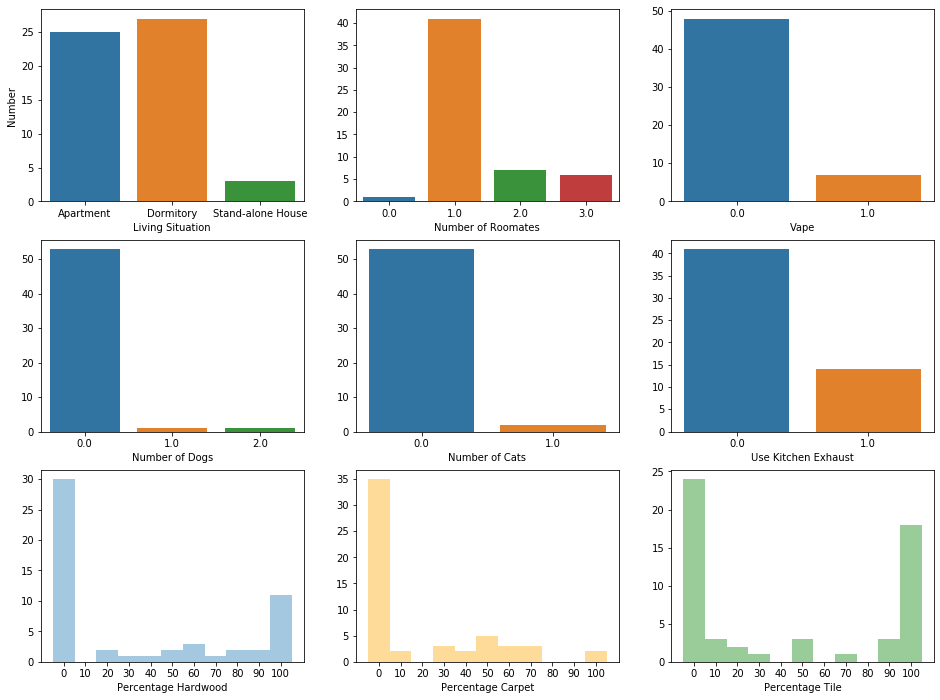

In [53]:
living = heh.groupby('livingsit').count()
fig, ax = plt.subplots(3,3,figsize=(16,12))
sns.barplot(x=living.index, y=living['record_id'],ax=ax[0,0])
ax[0,0].set_xlabel('Living Situation')
ax[0,0].set_ylabel('Number')
mates = heh.groupby('roommates').count()
sns.barplot(x=mates.index, y=mates['record_id'],ax=ax[0,1])
ax[0,1].set_xlabel('Number of Roomates')
ax[0,1].set_ylabel('')
vape = heh.groupby('vape').count()
sns.barplot(x=vape.index, y=vape['record_id'],ax=ax[0,2])
ax[0,2].set_xlabel('Vape')
ax[0,2].set_ylabel('')
dogs = heh.groupby('amt_dogs').count()
sns.barplot(x=dogs.index, y=dogs['record_id'],ax=ax[1,0])
ax[1,0].set_xlabel('Number of Dogs')
ax[1,0].set_ylabel('')
cats = heh.groupby('amt_cats').count()
sns.barplot(x=cats.index, y=cats['record_id'],ax=ax[1,1])
ax[1,1].set_xlabel('Number of Cats')
ax[1,1].set_ylabel('')
exhaust = heh.groupby('kitchen_exhaust').count()
sns.barplot(x=exhaust.index, y=exhaust['record_id'],ax=ax[1,2])
ax[1,2].set_xlabel('Use Kitchen Exhaust')
ax[1,2].set_ylabel('')
sns.distplot(heh['hardwd_amt'],bins=np.arange(0,120,10),kde=False,hist_kws={'align':'left'},ax=ax[2,0])
ax[2,0].set_xlabel('Percentage Hardwood')
ax[2,0].set_xticks(np.arange(0,105,10))
ax[2,0].set_ylabel('')
sns.distplot(heh['amt_carpet'],bins=np.arange(0,120,10),color='orange',kde=False,hist_kws={'align':'left'},ax=ax[2,1])
ax[2,1].set_xlabel('Percentage Carpet')
ax[2,1].set_xticks(np.arange(0,105,10))
ax[2,1].set_ylabel('')
sns.distplot(heh['tile_amt'],bins=np.arange(0,120,10),color='green',kde=False,hist_kws={'align':'left'},ax=ax[2,2])
ax[2,2].set_xlabel('Percentage Tile')
ax[2,2].set_xticks(np.arange(0,105,10))
ax[2,2].set_ylabel('')
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/comb-heh-summary.png')

plt.show()
plt.close()

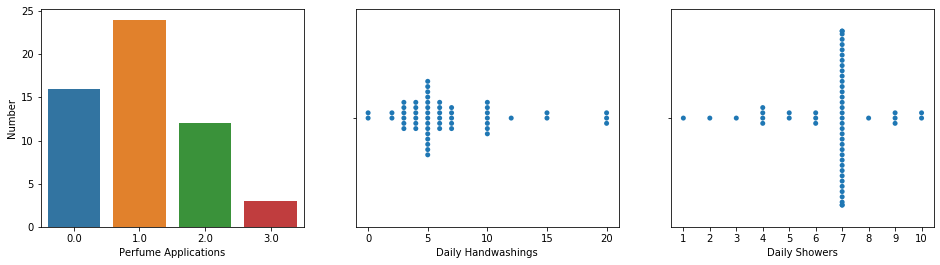

In [54]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
perf = heh.groupby('apply_perf').count()
sns.barplot(x=perf.index, y=perf['record_id'],ax=ax[0])
ax[0].set_xlabel('Perfume Applications')
ax[0].set_ylabel('Number')
sns.swarmplot(x=heh['washhand_amt'],ax=ax[1])
ax[1].set_xlabel('Daily Handwashings')
ax[1].set_ylabel('')
sns.swarmplot(x=heh['shower_amt'],ax=ax[2])
ax[2].set_xlabel('Daily Showers')
ax[2].set_xticks(np.arange(1,max(heh['shower_amt'])+1,1))
ax[2].set_ylabel('')
plt.show()
plt.close()

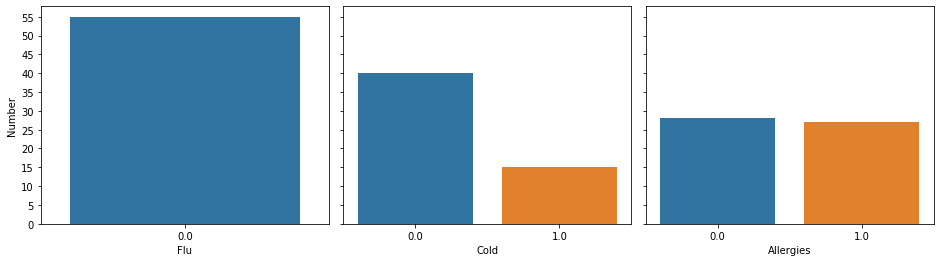

In [55]:
fig, ax = plt.subplots(1,3,figsize=(16,4),sharey=True)
flu = heh.groupby('flu_3w').count()
sns.barplot(x=flu.index, y=flu['record_id'],ax=ax[0])
ax[0].set_xlabel('Flu')
ax[0].set_ylabel('Number')
ax[0].set_yticks(np.arange(0,60,5))
cold = heh.groupby('cold_3w').count()
sns.barplot(x=cold.index, y=cold['record_id'],ax=ax[1])
ax[1].set_xlabel('Cold')
ax[1].set_ylabel('')
allergy = heh.groupby('allergies_3w').count()
sns.barplot(x=allergy.index, y=allergy['record_id'],ax=ax[2])
ax[2].set_xlabel('Allergies')
ax[2].set_ylabel('')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.show()
plt.close()

# Beiwe and HEH
Relationships between mood and survey answers.

In [56]:
# Beiwe variables
summaries = [sad_summary,lonely_summary,content_summary,stress_summary,energy_summary]
comps = [sad_comp,lonely_comp,content_comp,stress_comp,energy_comp]
hehonlys = [sad_hehonly,lonely_hehonly,content_hehonly,stress_hehonly,energy_hehonly]
moods = ['Sad','Lonely','Content','Stress','Energy']
colors = ['cornflowerblue','gray','gold','firebrick','seagreen']

In [57]:
# HEH variables
heh.columns

Index(['record_id', 'livingsit', 'amt_fem_house', 'amt_male_house',
       'amt_nonbin_house', 'smoke', 'vape', 'pets', 'other_pet_names',
       'amt_dogs', 'amt_cats', 'amt_otherpet', 'living_floor', 'amt_carpet',
       'hardwd_amt', 'tile_amt', 'cook_home', 'kitchen_exhaust', 'flu_3w',
       'flu_shot', 'flu_shot_plan', 'cold_3w', 'allergies_3w', 'apply_perf',
       'washhand_amt', 'shower_amt', 'study', 'roommates'],
      dtype='object')

## UT1000/2000: Mood Comparison
A quick look at the mood between everyone in UT1000 and the subset that answered the home environment survey. Perhaps they are more sad, content, etc.

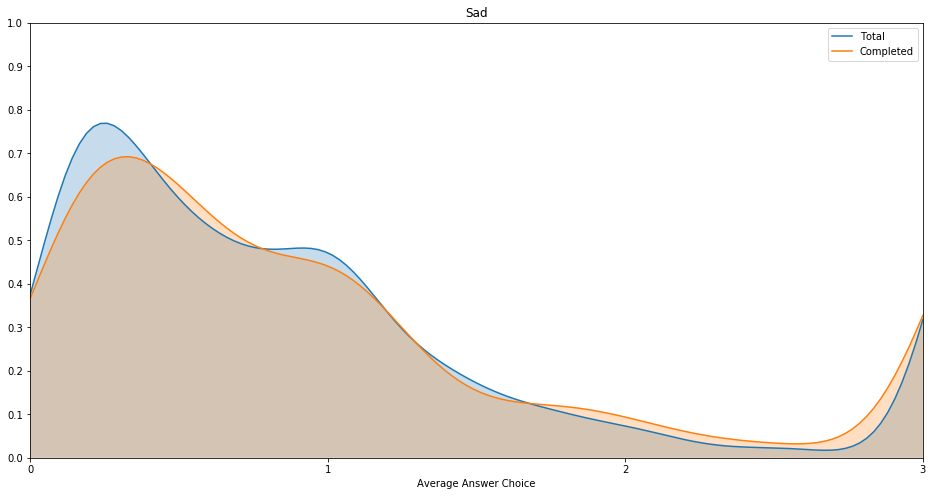

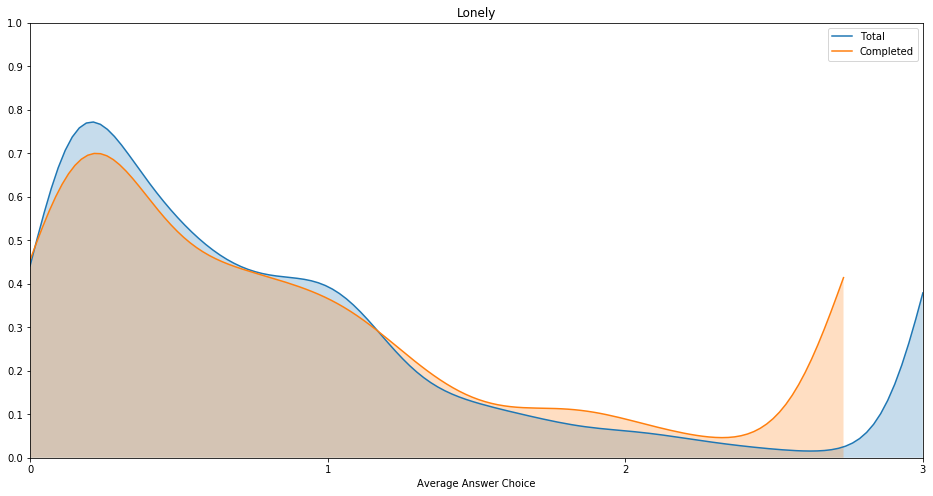

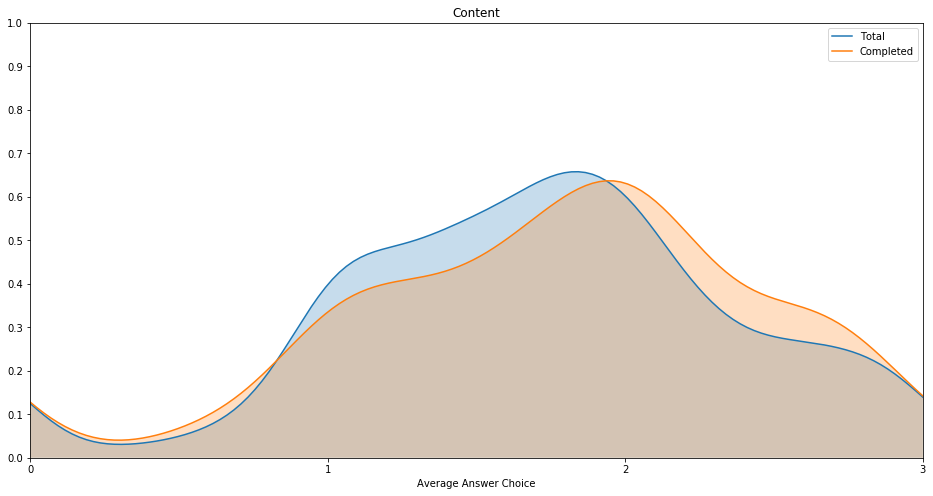

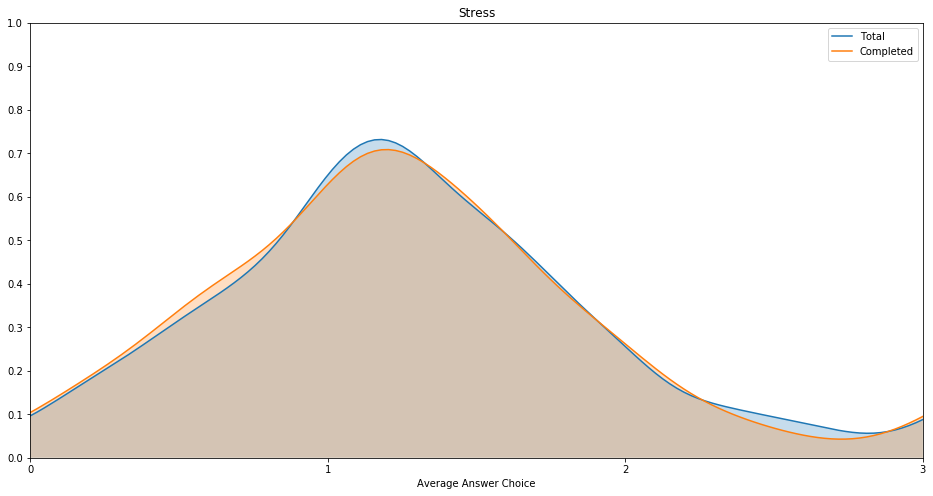

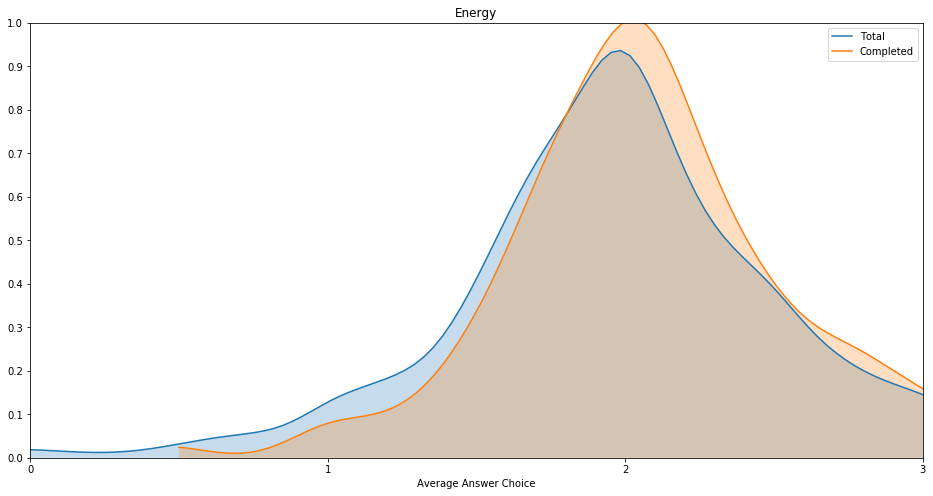

In [58]:
for summary,hehonly,mood in zip(summaries,hehonlys,moods):
    fig,ax = plt.subplots(figsize=(16,8))
    # total
    sns.kdeplot(data=summary['mean'],shade=True,cut=0,ax=ax,label='Total')
    # subset
    sns.kdeplot(data=hehonly['mean'],shade=True,cut=0,ax=ax,label='Completed')
    # x-axis
    ax.set_xlim([0,3])
    ax.set_xlabel('Average Answer Choice')
    ax.set_xticks([0,1,2,3])
    # y-axis
    ax.set_ylim([0,1])
    ax.set_yticks(np.arange(0,1.1,0.1))
    # 
    ax.set_title(mood)

    plt.show()
    plt.close()

The distributions seem to be similar at least for sadness.

Might be interesting to see if our participants had larger "swings" in their answer choices.

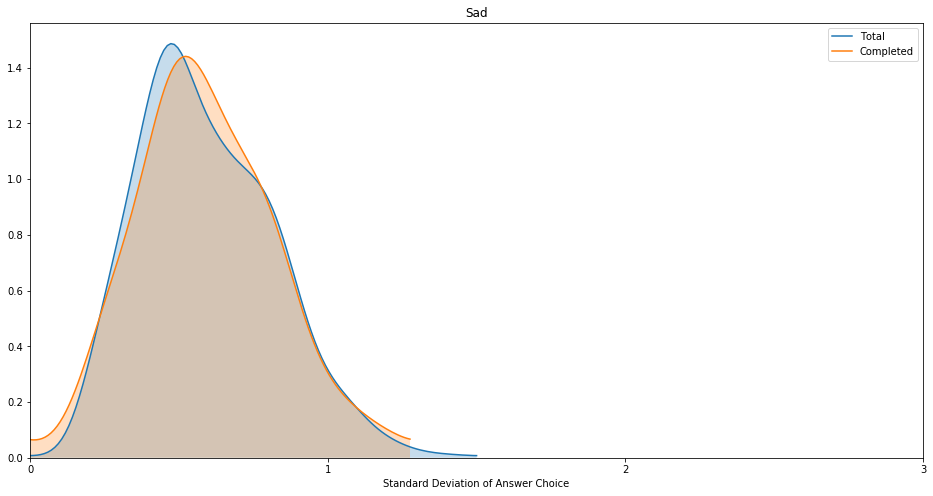

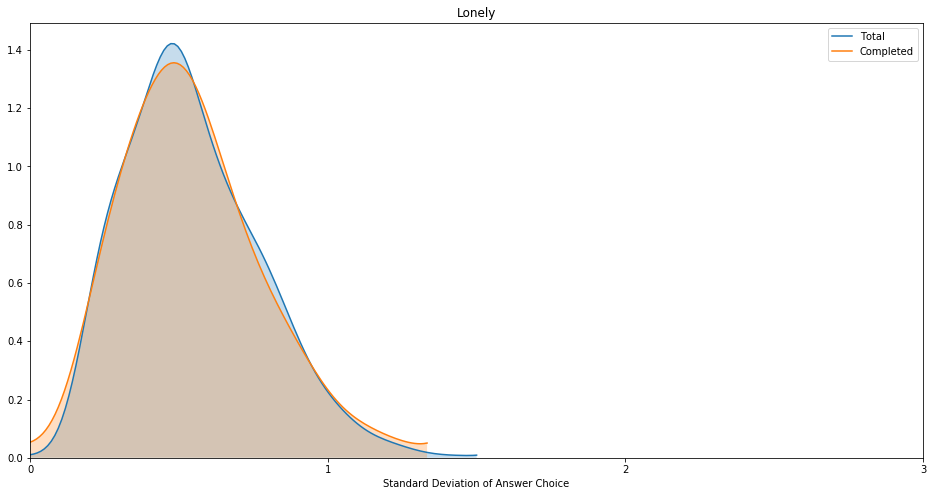

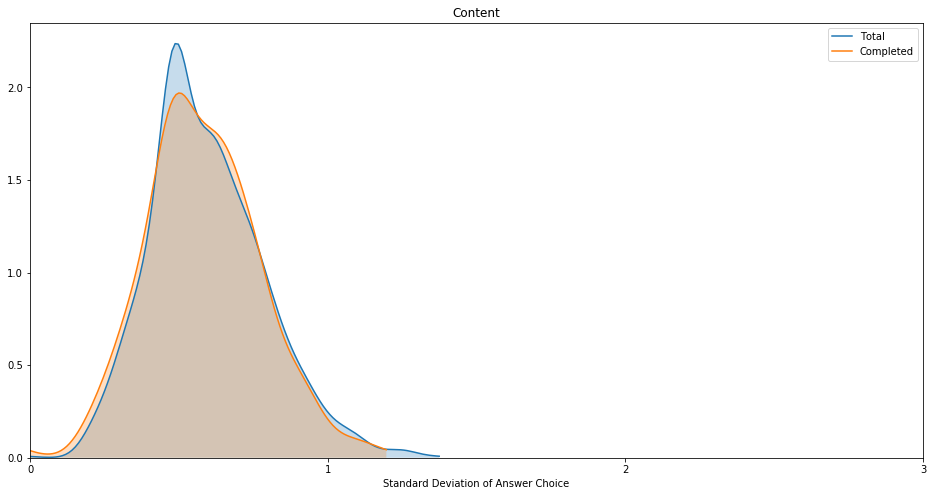

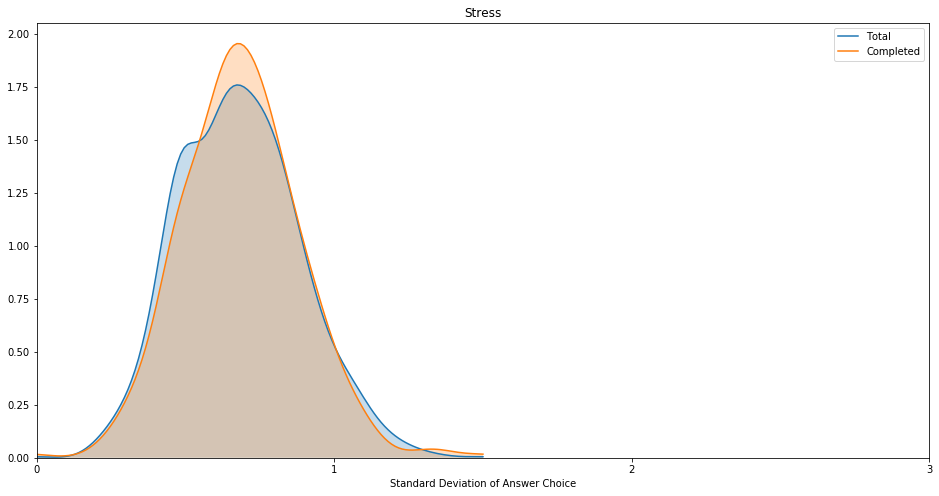

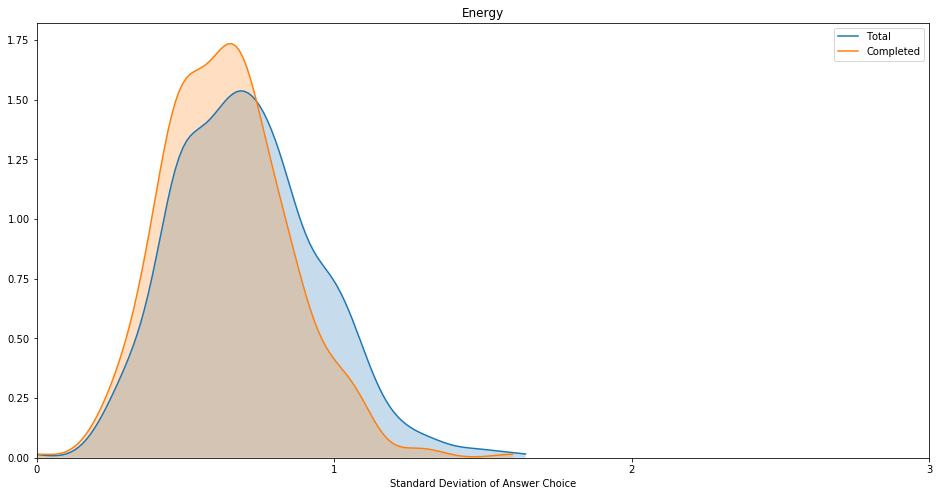

In [59]:
for summary,hehonly,mood in zip(summaries,hehonlys,moods):
    fig,ax = plt.subplots(figsize=(16,8))
    # Total
    sns.kdeplot(data=summary['std'],shade=True,cut=0,ax=ax,label='Total')
    # Subset
    sns.kdeplot(data=hehonly['std'],shade=True,cut=0,ax=ax,label='Completed')
    # x-axis
    ax.set_xlim([0,3])
    ax.set_xlabel('Standard Deviation of Answer Choice')
    ax.set_xticks([0,1,2,3])
    # 
    ax.set_title(mood)

    plt.show()
    plt.close()

...they don't seem to...

## UT1000/2000: Mood and Pets
Do pets cure loneliness?

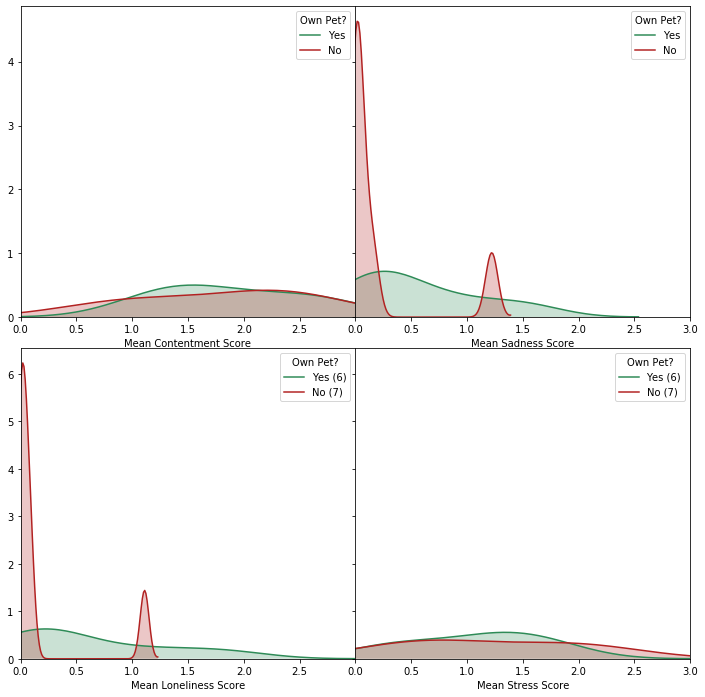

In [60]:
fig,ax = plt.subplots(2,2,figsize=(12,12),sharey='row')
# content
df = content_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_pet = df[df['pets'] != 0]
df_npet = df[df['pets'] == 0]
sns.kdeplot(data=df_pet['mean'],color='seagreen',ax=ax[0,0],shade=True,label='Yes')
sns.kdeplot(data=df_npet['mean'],color='firebrick',ax=ax[0,0],shade=True,label='No')
ax[0,0].legend(title='Own Pet?')
ax[0,0].set_xlim([0,3])
ax[0,0].set_xticks(np.arange(0,3,0.5))
ax[0,0].set_xlabel('Mean Contentment Score')
# sadness
df = sad_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_pet = df[df['pets'] != 0]
df_npet = df[df['pets'] == 0]
sns.kdeplot(data=df_pet['mean'],color='seagreen',ax=ax[0,1],shade=True,label='Yes')
sns.kdeplot(data=df_npet['mean'],color='firebrick',ax=ax[0,1],shade=True,label='No')
ax[0,1].legend(title='Own Pet?')
ax[0,1].set_xlim([0,3])
ax[1,1].set_xticks(np.arange(0,3.5,0.5))
ax[0,1].set_xlabel('Mean Sadness Score')
# lonliness
df = lonely_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_pet = df[df['pets'] != 0]
df_npet = df[df['pets'] == 0]
sns.kdeplot(data=df_pet['mean'],color='seagreen',ax=ax[1,0],shade=True,label=f'Yes ({len(df_pet)})')
sns.kdeplot(data=df_npet['mean'],color='firebrick',ax=ax[1,0],shade=True,label=f'No ({len(df_npet)})')
ax[1,0].legend(title='Own Pet?')
ax[1,0].set_xlim([0,3])
ax[1,0].set_xticks(np.arange(0,3,0.5))
ax[1,0].set_xlabel('Mean Loneliness Score')
# stress
df = stress_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_pet = df[df['pets'] != 0]
df_npet = df[df['pets'] == 0]
sns.kdeplot(data=df_pet['mean'],color='seagreen',ax=ax[1,1],shade=True,label=f'Yes ({len(df_pet)})')
sns.kdeplot(data=df_npet['mean'],color='firebrick',ax=ax[1,1],shade=True,label=f'No ({len(df_npet)})')
ax[1,1].legend(title='Own Pet?')
ax[1,1].set_xlim([0,3])
ax[1,1].set_xticks(np.arange(0,3.5,0.5))
ax[1,1].set_xlabel('Mean Stress Score')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.1)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/comb-heh-beiwe-pet-mood-kdediff.png')

plt.show()
plt.close()

## UT1000/2000: Mood and Number of Roommates
Perhaps the number of roommates might explain the mood answer choices.

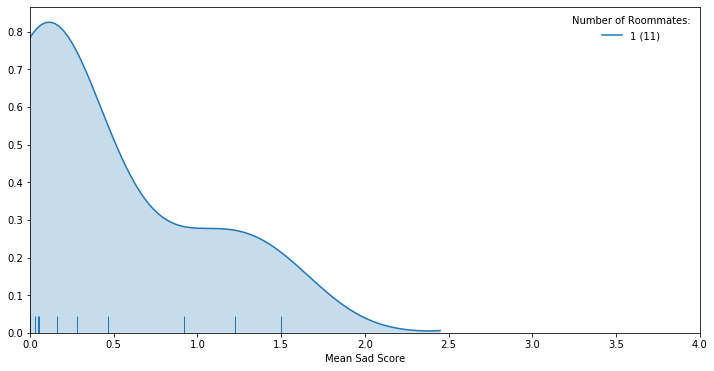

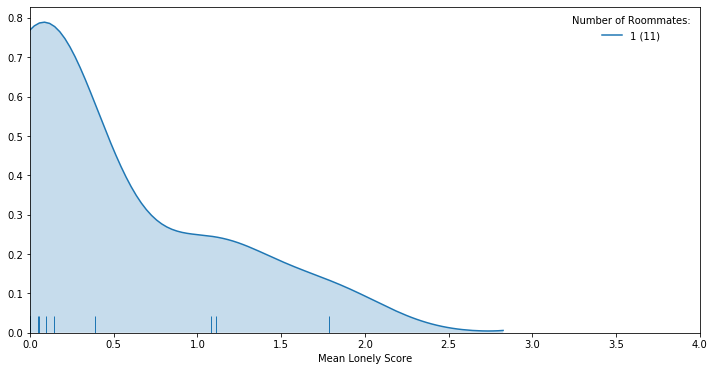

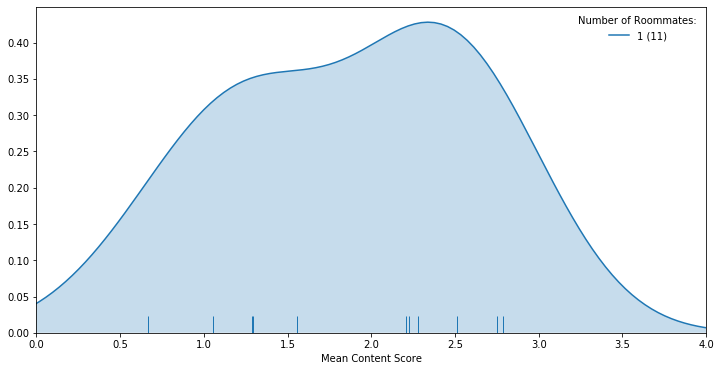

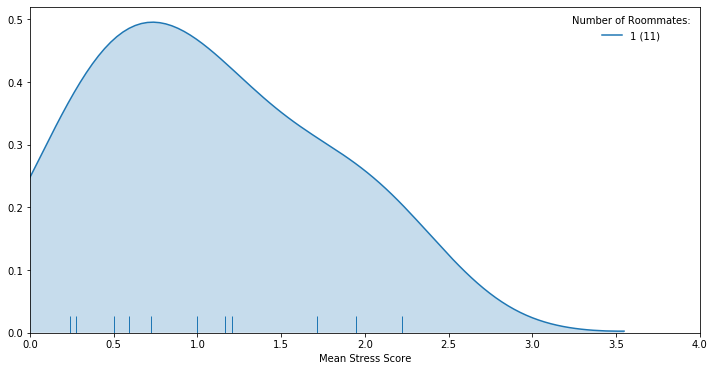

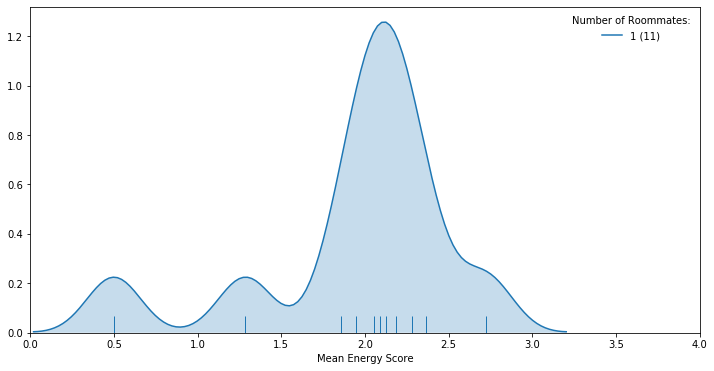

In [61]:
for hehonly, mood in zip(hehonlys,moods):
    df = hehonly.merge(right=heh,left_on='record',right_on='record_id')

    fig, ax = plt.subplots(figsize=(12,6))
    for num_mates in df['roommates'].unique():
        room = df[df['roommates'] == num_mates]
        if len(room) > 1:
            sns.distplot(room['mean'],bins=np.arange(0,3.5,0.5),hist=False,rug=True,kde=True,
                         kde_kws={'shade':True},
                         hist_kws={'density':True,'align':'left'},
                         label=str(num_mates)[0]+' ('+str(len(room))+')',ax=ax)
    ut1000 = False
    if ut1000:
        sns.distplot(sad_1_summary['mean'],hist=True,rug=False,kde=False,
                             kde_kws={'cut':0,'shade':True},
                             label=f'UT1000 ({len(sad_summary)})',ax=ax)
    ax.legend(title='Number of Roommates:',frameon=False)
    ax.set_xlabel(f'Mean {mood} Score')
    ax.set_xlim([0,4])
    plt.show()
    plt.close()

## UT1000/2000: Cold/Allergies and Stress/Energy
Do allergies and/or having the cold influence your stress or energy level?

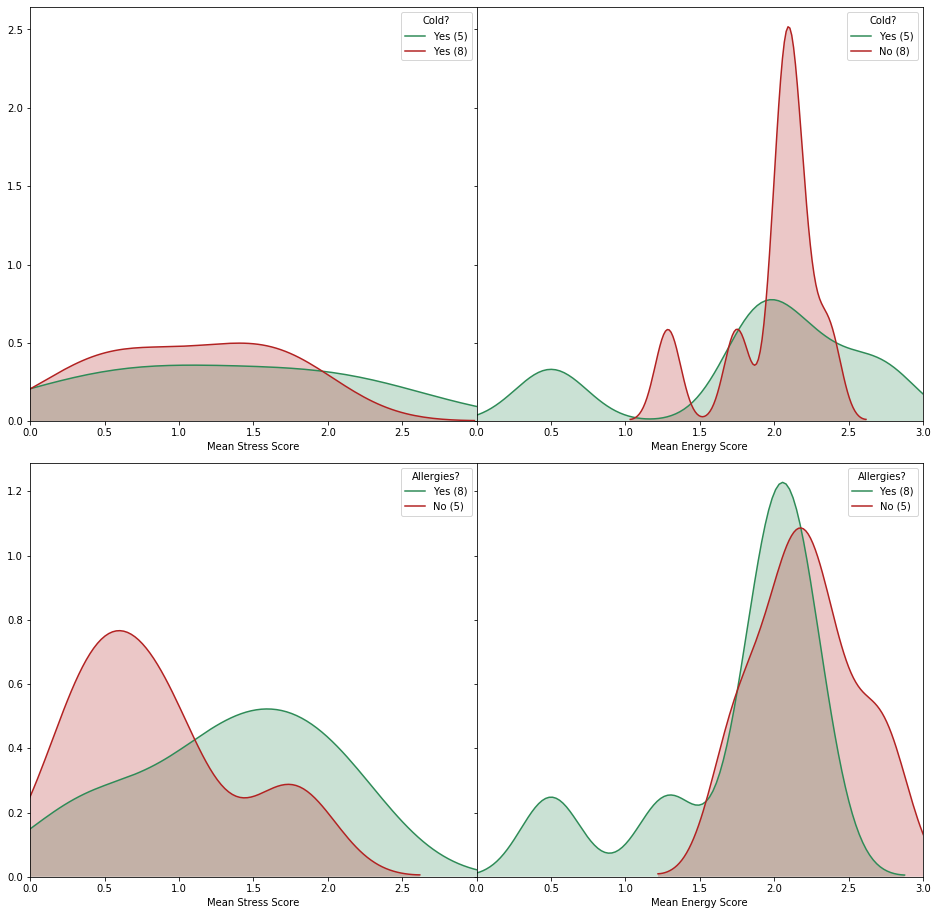

In [62]:
fig,ax = plt.subplots(2,2,figsize=(16,16),sharey='row')
# stress
df = stress_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_cold = df[df['cold_3w'] == 1]
df_ncold = df[df['cold_3w'] == 0]
sns.kdeplot(data=df_cold['mean'],color='seagreen',ax=ax[0,0],shade=True,label=f'Yes ({len(df_cold)})')
sns.kdeplot(data=df_ncold['mean'],color='firebrick',ax=ax[0,0],shade=True,label=f'Yes ({len(df_ncold)})')
ax[0,0].legend(title='Cold?')
ax[0,0].set_xlim([0,3])
ax[0,0].set_xticks(np.arange(0,3,0.5))
ax[0,0].set_xlabel('Mean Stress Score')
# energy
df = energy_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_cold = df[df['cold_3w'] == 1]
df_ncold = df[df['cold_3w'] == 0]
sns.kdeplot(data=df_cold['mean'],color='seagreen',ax=ax[0,1],shade=True,label=f'Yes ({len(df_cold)})')
sns.kdeplot(data=df_ncold['mean'],color='firebrick',ax=ax[0,1],shade=True,label=f'No ({len(df_ncold)})')
ax[0,1].legend(title='Cold?')
ax[0,1].set_xlim([0,3])
ax[0,1].set_xticks(np.arange(0,3.5,0.5))
ax[0,1].set_xlabel('Mean Energy Score')
# stress
df = stress_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_cold = df[df['allergies_3w'] == 1]
df_ncold = df[df['allergies_3w'] == 0]
sns.kdeplot(data=df_cold['mean'],color='seagreen',ax=ax[1,0],shade=True,label=f'Yes ({len(df_cold)})')
sns.kdeplot(data=df_ncold['mean'],color='firebrick',ax=ax[1,0],shade=True,label=f'No ({len(df_ncold)})')
ax[1,0].legend(title='Allergies?')
ax[1,0].set_xlim([0,3])
ax[1,0].set_xticks(np.arange(0,3,0.5))
ax[1,0].set_xlabel('Mean Stress Score')
# energy
df = energy_hehonly.merge(right=heh,left_on='record',right_on='record_id')
df_cold = df[df['allergies_3w'] == 1]
df_ncold = df[df['allergies_3w'] == 0]
sns.kdeplot(data=df_cold['mean'],color='seagreen',ax=ax[1,1],shade=True,label=f'Yes ({len(df_cold)})')
sns.kdeplot(data=df_ncold['mean'],color='firebrick',ax=ax[1,1],shade=True,label=f'No ({len(df_ncold)})')
ax[1,1].legend(title='Allergies?')
ax[1,1].set_xlim([0,3])
ax[1,1].set_xticks(np.arange(0,3.5,0.5))
ax[1,1].set_xlabel('Mean Energy Score')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.1)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/comb-heh-beiwe-coldallergy-mood-kdediff.png')

plt.show()
plt.close()

## UT1000/2000: Mood and Handwashing/Perfume

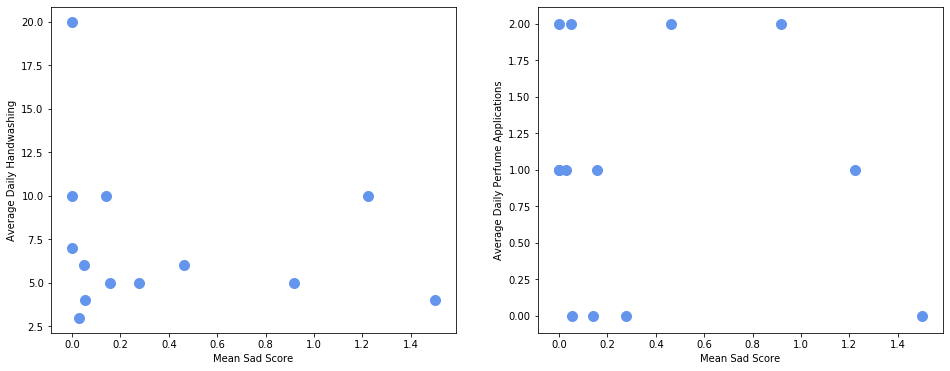

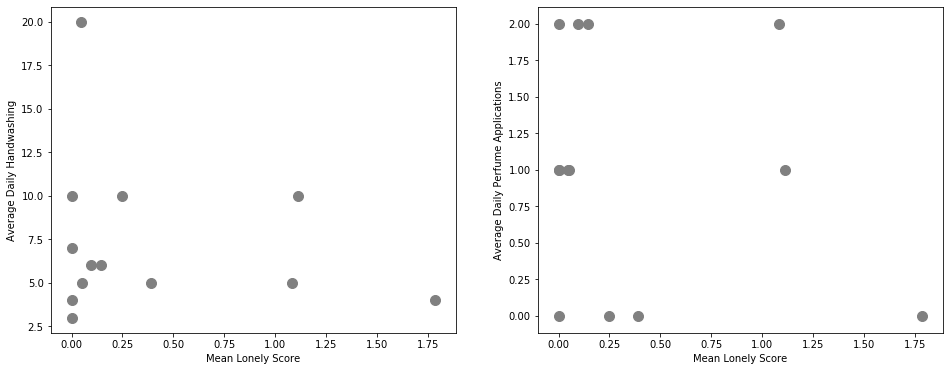

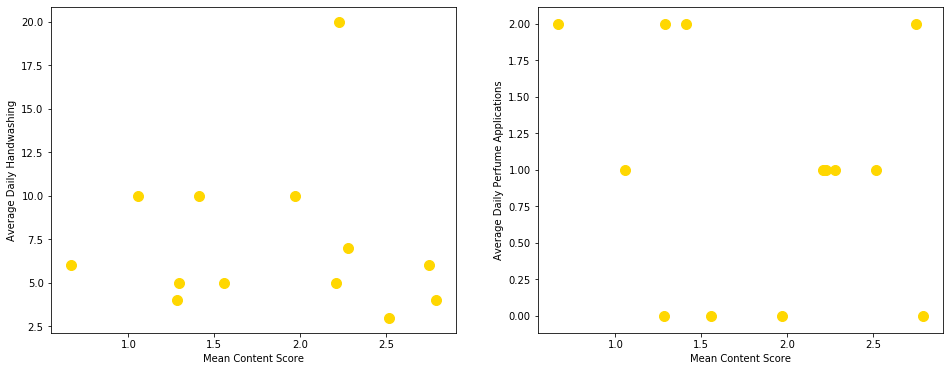

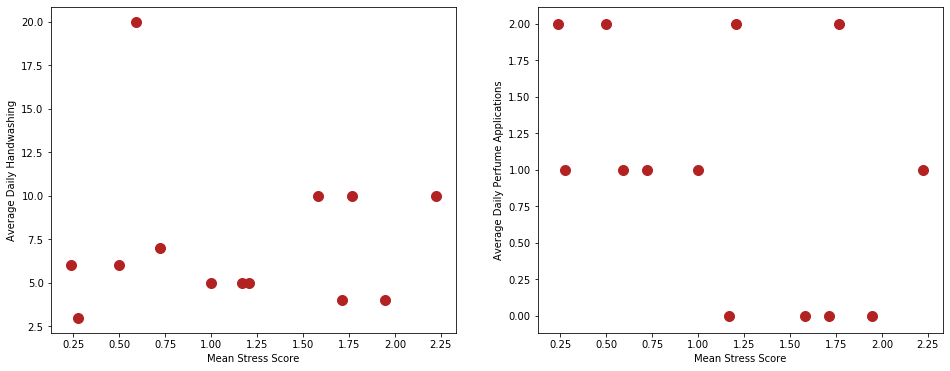

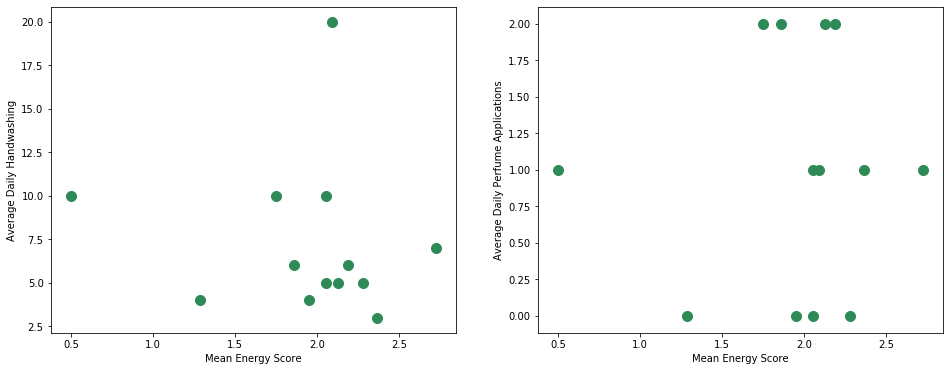

In [63]:
for hehonly, mood, color in zip(hehonlys,moods,colors):
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    df = hehonly.merge(right=heh,left_on='record',right_on='record_id')
    # Number of activities
    ax[0].scatter(x=df['mean'],y=df['washhand_amt'],color=color,s=100)
    ax[0].set_xlabel(f'Mean {mood} Score')
    ax[0].set_ylabel('Average Daily Handwashing')
    # Total Duration of Activities
    ax[1].scatter(x=df['mean'],y=df['apply_perf'],color=color,s=100)
    ax[1].set_xlabel(f'Mean {mood} Score')
    ax[1].set_ylabel('Average Daily Perfume Applications')

# Beiwe and Fitbit
Mood and some physical health aspect

## UT1000/2000: Mood and TST

In [64]:
sleep_summary['TotalMinutesNREM'] = sleep_summary['TotalMinutesLight']+sleep_summary['TotalMinutesDeep']
sleep_summary['REM2NREM'] = sleep_summary['TotalMinutesREM']/sleep_summary['TotalMinutesNREM']

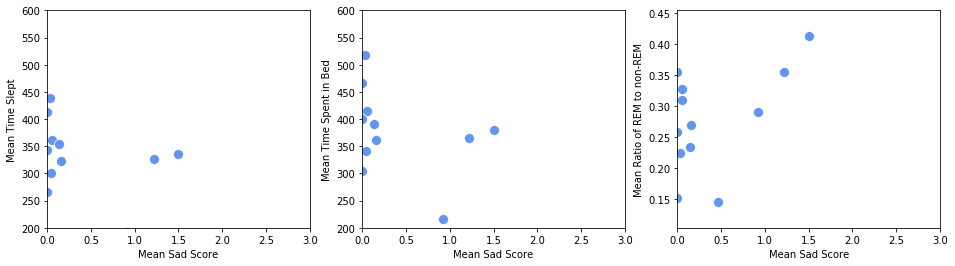

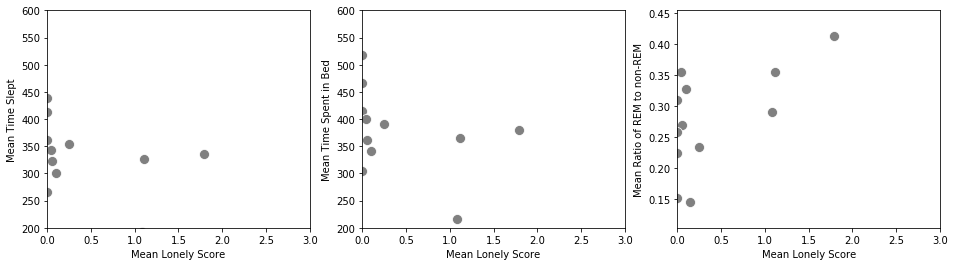

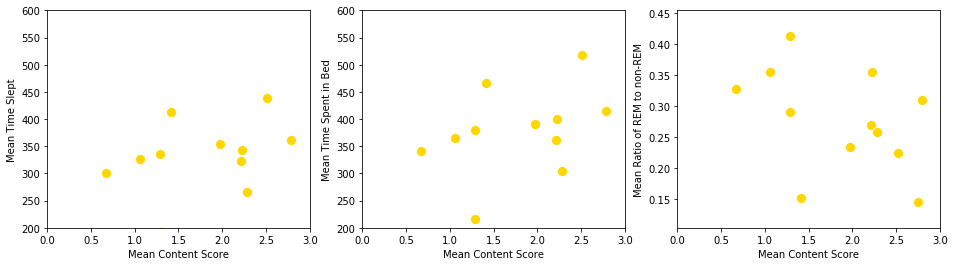

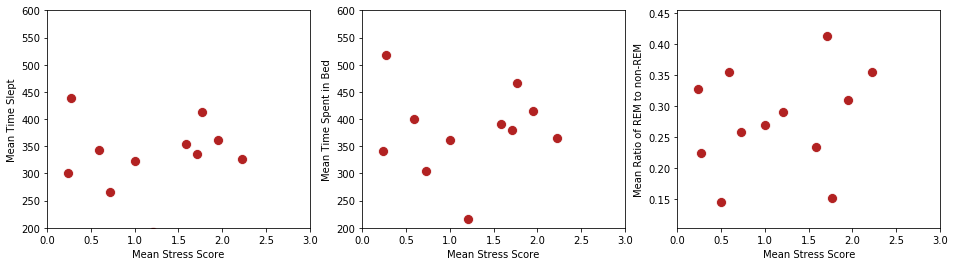

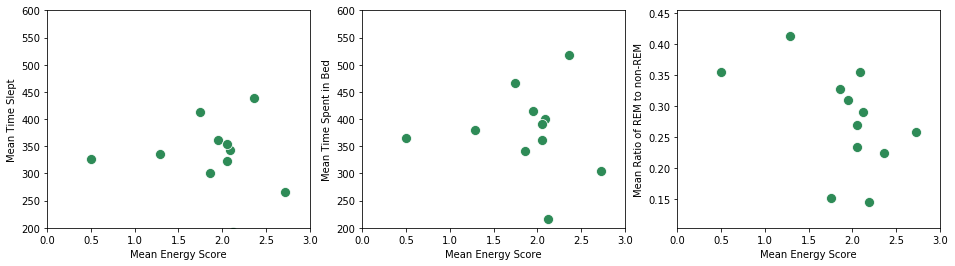

In [65]:
for summary, mood, color in zip(summaries,moods,colors):
    df = sleep_summary.merge(right=summary,left_on='beiwe',right_on='ID')

    fig, ax = plt.subplots(1,3,figsize=(16,4))
    sns.scatterplot(x='mean',y='TotalMinutesAsleep',data=df,ax=ax[0],s=100,color=color)
    ax[0].set_xlabel(f'Mean {mood} Score')
    ax[0].set_ylabel('Mean Time Slept')
    ax[0].set_xlim([0,3])
    ax[0].set_ylim([200,600])
    sns.scatterplot(x='mean',y='TotalTimeInBed',data=df,ax=ax[1],s=100,color=color)
    ax[1].set_xlabel(f'Mean {mood} Score')
    ax[1].set_ylabel('Mean Time Spent in Bed')
    ax[1].set_xlim([0,3])
    ax[1].set_ylim([200,600])
    sns.scatterplot(x='mean',y='REM2NREM',data=df,ax=ax[2],s=100,color=color)
    ax[2].set_xlabel(f'Mean {mood} Score')
    ax[2].set_ylabel('Mean Ratio of REM to non-REM')
    ax[2].set_xlim([0,3])
    plt.show()
    plt.close()

## UT1000/2000: Mood and TST

IndexError: index 0 is out of bounds for axis 0 with size 0

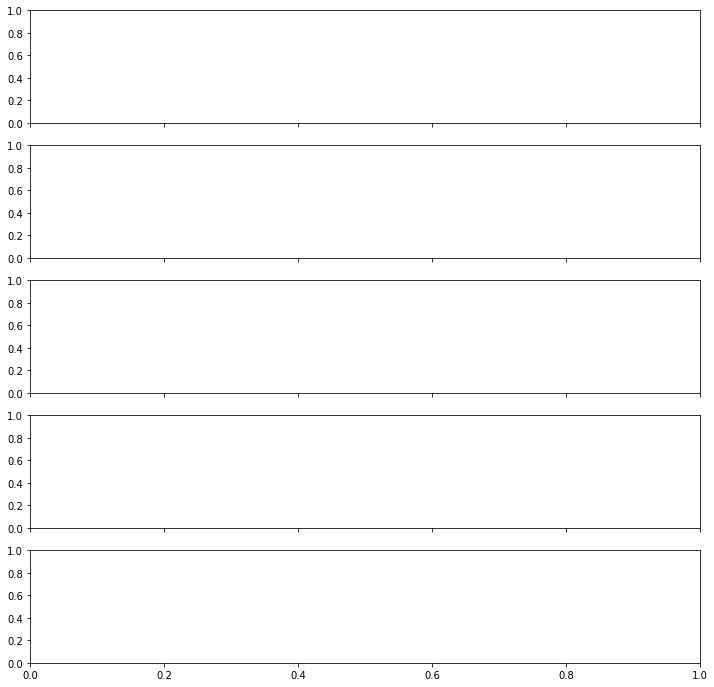

In [67]:
overall = pd.DataFrame()

fig, axes = plt.subplots(5,1,figsize=(12,12), sharex=True)
r = 0
for comp, mood, color in zip(comps,moods,colors):
    sleep_mood = pd.DataFrame()
    for rid in sleep['Id'].unique():
        bid = record_beiwe_ids[record_beiwe_ids['record'] == rid]['beiwe'].values[0]
        sleep_byid = sleep[sleep['Id'] == rid]
        sleep_byid = sleep_byid[sleep_byid['TotalMinutesLight'] > 0]
        mood_byid = comp[comp['pid'] == bid]
        mood_byid = mood_byid.groupby(mood_byid.index).mean()
        combined = mood_byid.merge(right=sleep_byid,right_on='SleepDay',left_index=True,how='inner')
        combined['adequate_sleep'] = np.where(combined['TotalMinutesAsleep'] > 360, True, False)
        if len(combined) > 0:
            sleep_mood = pd.concat([sleep_mood,combined])
           
    sleep_mood['mood'] = mood
    overall = pd.concat([overall,sleep_mood])
    
    sleep_mood_as = sleep_mood[sleep_mood['adequate_sleep'] == True]
    sleep_mood_nas = sleep_mood[sleep_mood['adequate_sleep'] == False]
    ax = axes[r]
    ax.hist(x=sleep_mood_as['answer'],bins=[0,1,2,3,4],align='left',rwidth=0.5,color=color,edgecolor='black',density=True,label=f'Adequate Sleep ({len(sleep_mood_as)})')
    ax.hist(x=sleep_mood_nas['answer'],bins=[0,1,2,3,4],align='mid',rwidth=0.5,color=color,alpha=0.5,hatch='/',edgecolor='black',density=True,label=f'Inadequate Sleep ({len(sleep_mood_nas)})')
    ax.set_xticks([0.25,1.25,2.25,3.25])
    ax.axvline(0.75,color='black')
    ax.axvline(1.75,color='black')
    ax.axvline(2.75,color='black')
    ax.set_xlim([-0.25,3.75])
    ax.set_ylim([0,1])
    ax.set_yticks(np.arange(0.2,1,0.2))
    ax.set_xticklabels(['0','1','2','3'])
    ax.set_ylabel(f'{mood}')
    r += 1

axes[1].legend(loc='upper center',bbox_to_anchor=(0.5,-3.2),frameon=False,ncol=2)
ax.set_xlabel('Mood Rating')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/comb-fitbit-beiwe-tst-mood-comprehensive.png')

plt.show()
plt.close()

## Mood and Sleep Stages
Instead of looking at total time in bed/asleep, we can look deeper at sleep stages.

In [ ]:
for summary, mood, color in zip(summaries,moods,colors):
    df = sleep_summary.merge(right=summary,left_on='beiwe',right_on='ID')

    fig, ax = plt.subplots(1,3,figsize=(16,4))
    sns.scatterplot(x='mean',y='TotalTimeAwake',data=df,ax=ax[0],s=100,color=color)
    ax[0].set_xlabel(f'Mean {mood} Score')
    ax[0].set_ylabel('Mean Time Awake')
    ax[0].set_xlim([0,3])
    sns.scatterplot(x='mean',y='TotalMinutesNREM',data=df,ax=ax[1],s=100,color=color)
    ax[1].set_xlabel(f'Mean {mood} Score')
    ax[1].set_ylabel('Mean Time in non-REM')
    ax[1].set_xlim([0,3])
    sns.scatterplot(x='mean',y='TotalMinutesREM',data=df,ax=ax[2],s=100,color=color)
    ax[2].set_xlabel(f'Mean {mood} Score')
    ax[2].set_ylabel('Mean Time in REM')
    ax[2].set_xlim([0,3])
    plt.show()
    plt.close()

## UT1000/2000: Mood and Steps/Calories
Mood compared to number of steps or calories burned which should be an indication of some level of activity.

In [ ]:
for summary, mood, color in zip(summaries,moods,colors):
    df = steps_summary.merge(right=summary,left_on='beiwe',right_on='ID')

    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.scatterplot(x='mean',y='StepTotal',data=df,color=color,ax=ax[0],s=150)
    ax[0].set_xlabel(f'Mean {mood} Score')
    ax[0].set_ylabel('Mean Daily Steps')
    ax[0].set_xlim([0,3])
    ax[0].set_ylim([0,17500])
    df = cal_summary.merge(right=summary,left_on='beiwe',right_on='ID')
    sns.scatterplot(x='mean',y='Calories',data=df,color=color,ax=ax[1],s=150)
    ax[1].set_xlabel(f'Mean {mood} Score')
    ax[1].set_ylabel('Mean Daily Calories Burned')
    ax[1].set_xlim([0,3])
    ax[1].set_ylim([0,4000])
    
    plt.show()
    plt.close()

## UT1000/2000: Mood and Activity
Now we look at the literal activity data logged by the users.

In [ ]:
r = 0
fig, ax = plt.subplots(5,2,figsize=(12,12), sharey=True, sharex='col')
for summary, mood, color in zip(summaries,moods,colors):
    df = act_summary.merge(right=summary,left_on='beiwe',right_on='ID')
    # Number of activities
    ax[r,0].scatter(x=df['n'],y=df['mean'],color=color)
    ax[r,0].set_ylabel(f'Mean {mood} Score')
    ax[r,0].set_xlabel('Mean Number of Activities Recorded by FB')
    # Total Duration of Activities
    ax[r,1].scatter(x=df['Total_Time']/3600,y=df['mean'],color=color)
    ax[r,1].set_xlabel('Total Duration of Activities (h)')
    
    r += 1
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/comb-fitbit-beiwe-activity-mood-scattermean.png')

plt.show()
plt.close()

In [ ]:
act['Date'] = pd.to_datetime(act['Date'])
overall = pd.DataFrame()

fig, axes = plt.subplots(5,1,figsize=(12,12), sharex=True)
r = 0
for comp, mood, color in zip(comps,moods,colors):
    act_mood = pd.DataFrame()
    for rid in act['Id'].unique():
        bid = record_beiwe_ids[record_beiwe_ids['record'] == rid]['beiwe'].values[0]
        act_byid = act[act['Id'] == rid]
        mood_byid = comp[comp['pid'] == bid]
        combined = mood_byid.merge(right=act_byid,right_on='Date',left_index=True,how='left',indicator='exercise')
        combined['exercise'] = np.where(combined['exercise'] == 'both', True, False)
        if len(combined) > 0:
            act_mood = pd.concat([act_mood,combined])
           
    act_mood['mood'] = mood
    overall = pd.concat([overall,act_mood])
    
    act_mood_ex = act_mood[act_mood['exercise'] == True]
    act_mood_noex = act_mood[act_mood['exercise'] == False]
    ax = axes[r]
    ax.hist(x=act_mood_ex['answer'],bins=[0,1,2,3,4],align='left',rwidth=0.5,color=color,edgecolor='black',density=True,label=f'Exercise ({len(act_mood_ex)})')
    ax.hist(x=act_mood_noex['answer'],bins=[0,1,2,3,4],align='mid',rwidth=0.5,color=color,alpha=0.5,hatch='/',edgecolor='black',density=True,label=f'No Exercise ({len(act_mood_noex)})')
    ax.set_xticks([0.25,1.25,2.25,3.25])
    ax.axvline(0.75,color='black')
    ax.axvline(1.75,color='black')
    ax.axvline(2.75,color='black')
    ax.set_xlim([-0.25,3.75])
    ax.set_ylim([0,1])
    ax.set_yticks(np.arange(0.2,1,0.2))
    ax.set_xticklabels(['0','1','2','3'])
    ax.set_ylabel(f'{mood}')
    r += 1

axes[1].legend(loc='upper center',bbox_to_anchor=(0.5,-3.2),frameon=False,ncol=2)
ax.set_xlabel('Mood Rating')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/comb-fitbit-beiwe-activity-mood-comprehensive.png')

plt.show()
plt.close()

# HEH and Fitbit
Survey answers and some physical health aspect.

## UT1000/2000: Hygiene and Steps

In [ ]:
df = heh.merge(right=steps_summary,left_on='record_id',right_on='record')

fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x='StepTotal',y='shower_amt',data=df,ax=ax[0],s=100)
ax[0].set_xlabel('Cohort Average Steps')
ax[0].set_ylabel('Average Amount of Showers per Week')
sns.scatterplot(x='StepTotal',y='washhand_amt',color='red',data=df,ax=ax[1],s=100)
ax[1].set_xlabel('Cohort Average Steps')
ax[1].set_ylabel('Average Amount of Handwashings per Day')
ax[1].set_yticks(np.arange(0,22,2))
plt.show()
plt.close()

## UT1000/2000: Hygiene and Activity

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
df = heh.merge(right=act_summary,left_on='record_id',right_on='record')
# Number of activities
ax[0].scatter(x=df['n'],y=df['shower_amt'],s=100)
ax[0].set_ylabel('Average Amount of Showers per Week')
ax[0].set_xlabel('Mean Number of Activities Recorded by FB')
# Total Duration of Activities
ax[1].scatter(x=df['Total_Time']/3600,y=df['washhand_amt'],color='red',s=100)
ax[1].set_ylabel('Average Amount of Handwashings per Day')
ax[1].set_xlabel('Total Duration of Activities (h)')
plt.show()
plt.close()

## UT1000/2000: Number of Roommates and TST

In [ ]:
df = sleep_summary.merge(right=heh,left_on='record',right_on='record_id')

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
for num_mates in df['roommates'].unique():
    room = df[df['roommates'] == num_mates]
    if len(room) > 1:
        sns.distplot(room['TotalTimeInBed']-room['TotalMinutesAsleep'],hist=False,rug=True,
                     kde_kws={'cut':0,'shade':True},
                     label=str(num_mates)[0]+' ('+str(len(room))+')',ax=ax)

ax.legend(title='Number of Roommates:',frameon=False)
ax.set_xlabel('Average Time Spent Awake (min)')
ax.set_xlim([10,50])
plt.show()
plt.close()

## UT1000/2000: Smoking/Vape and Sleep Stages

In [ ]:
heh['chimney'] = heh[['vape','smoke']].sum(axis=1)
heh_smoke = heh[heh['chimney'] == 1]
heh_nsmoke = heh[heh['chimney'] == 0]

In [ ]:
df_smoke = sleep_summary.merge(right=heh_smoke,left_on='record',right_on='record_id')
df_nsmoke = sleep_summary.merge(right=heh_nsmoke,left_on='record',right_on='record_id')

fig, ax = plt.subplots(1,3,figsize=(16,4))
# awake
sns.distplot(df_smoke['TotalTimeAwake'],bins=np.arange(0,90,10),hist_kws={'density':True},color='seagreen',ax=ax[0],kde=False,label=f'yes ({len(df_smoke)})')
sns.distplot(df_nsmoke['TotalTimeAwake'],bins=np.arange(0,90,10),hist_kws={'density':True},color='firebrick',ax=ax[0],kde=False,label=f'no ({len(df_nsmoke)})')
ax[0].set_xlabel('Average Number of Minutes Awake')
ax[0].legend(title='Smoke/Vape:')
# nREM
sns.distplot(df_smoke['TotalMinutesNREM'],bins=np.arange(0,450,50),hist_kws={'density':True},color='seagreen',ax=ax[1],kde=False,label=f'yes ({len(df_smoke)})')
sns.distplot(df_nsmoke['TotalMinutesNREM'],bins=np.arange(0,450,50),hist_kws={'density':True},color='firebrick',ax=ax[1],kde=False,label=f'no ({len(df_nsmoke)})')
ax[1].set_xlabel('Average Number of Minutes in NREM')
ax[1].legend(title='Smoke/Vape:')
# REM
sns.distplot(df_smoke['TotalMinutesREM'],bins=np.arange(0,110,10),hist_kws={'density':True},color='seagreen',ax=ax[2],kde=False,label=f'yes ({len(df_smoke)})')
sns.distplot(df_nsmoke['TotalMinutesREM'],bins=np.arange(0,110,10),hist_kws={'density':True},color='firebrick',ax=ax[2],kde=False,label=f'no ({len(df_nsmoke)})')
ax[2].set_xlabel('Average Number of Minutes in REM')
ax[2].legend(title='Smoke/Vape:')

plt.show()
plt.close()

fig, ax = plt.subplots(1,3,figsize=(16,4))
# awake
sns.kdeplot(df_smoke['TotalTimeAwake'],cut=0,color='seagreen',shade=True,ax=ax[0],label=f'yes ({len(df_smoke)})')
sns.kdeplot(df_nsmoke['TotalTimeAwake'],cut=0,color='firebrick',shade=True,ax=ax[0],label=f'no ({len(df_nsmoke)})')
ax[0].set_xlabel('Average Number of Minutes Awake')
ax[0].legend(title='Smoke/Vape:')
# nREM
sns.kdeplot(df_smoke['TotalMinutesNREM'],cut=0,color='seagreen',shade=True,ax=ax[1],label=f'yes ({len(df_smoke)})')
sns.kdeplot(df_nsmoke['TotalMinutesNREM'],cut=0,color='firebrick',shade=True,ax=ax[1],label=f'no ({len(df_nsmoke)})')
ax[1].set_xlabel('Average Number of Minutes in NREM')
ax[1].legend(title='Smoke/Vape:')
# REM
sns.kdeplot(df_smoke['TotalMinutesREM'],cut=0,color='seagreen',shade=True,ax=ax[2],label=f'yes ({len(df_smoke)})')
sns.kdeplot(df_nsmoke['TotalMinutesREM'],cut=0,color='firebrick',shade=True,ax=ax[2],label=f'no ({len(df_nsmoke)})')
ax[2].set_xlabel('Average Number of Minutes in REM')
ax[2].legend(title='Smoke/Vape:')

plt.show()
plt.close()

# HEH and Beacon
Survey answers and environmental monitoring

## UT2000: PM2.5 and Vaping

In [ ]:
# Getting average PM2.5 for non-vaping participants (everyone but beacon 12)
df_novape = pm_df[pm_df['number'] != '12']
df_novape = df_novape.resample('30s').mean()

In [ ]:
# Comparing PM2.5 for vaping and non-vaping participants
fig,ax = plt.subplots(figsize=(16,8))
df_vape = pm_df[pm_df['number'] == '12']
df_vape = df_vape[df_vape['pm2.5'] < 200]
df_novape['pm2.5'] = df_novape[df_novape['pm2.5'] < 200]
sns.kdeplot(df_vape['pm2.5'],ax=ax,label='Vape',color='seagreen',shade=True)
sns.kdeplot(df_novape['pm2.5'],label='No Vape',color='firebrick',shade=True)

plt.show()
plt.close()

In [ ]:
# Looking at vaping individual versus individual traces of others
fig,ax = plt.subplots(figsize=(16,8))
for number in pm_df['number'].unique():
    df = pm_df[pm_df['number'] == number]
    df = df[df['pm2.5'] < 200]
    if number == '12':
        sns.kdeplot(data=df['pm2.5'],ax=ax,label=number,linewidth=5,color='black')
    else:
        sns.kdeplot(data=df['pm2.5'],ax=ax,label=number,linewidth=1,linestyle='dashed')

## UT2000: TVOC and Vaping

In [ ]:
# Getting average TVOC for non-vaping participants
df_novape = tvoc_df[tvoc_df['number'] != '12']
df_novape = df_novape.resample('30s').mean()

In [ ]:
# Comparing PM2.5 for vaping and non-vaping participants
fig,ax = plt.subplots(figsize=(16,8))
df_vape = tvoc_df[tvoc_df['number'] == '12']
df_vape = df_vape[df_vape['TVOC'] < 1000]
df_novape = df_novape[df_novape['TVOC'] < 1000]
sns.kdeplot(df_vape['TVOC'],ax=ax,label='Vape',color='seagreen',shade=True)
sns.kdeplot(df_novape['TVOC'],label='No Vape',color='firebrick',shade=True)

plt.show()
plt.close()

In [ ]:
# Looking at vaping individual versus individual traces of others
fig,ax = plt.subplots(figsize=(16,8))
for number in tvoc_df['number'].unique():
    df = tvoc_df[tvoc_df['number'] == number]
    df = df[df['TVOC'] < 1000]
    if number == '12':
        sns.kdeplot(data=df['TVOC'],ax=ax,label='Yes',linewidth=3,color='firebrick')
    elif number =='01':
        sns.kdeplot(data=df['TVOC'],ax=ax,linewidth=5,alpha=0.5,color='seagreen',label='No')
    else:
        sns.kdeplot(data=df['TVOC'],ax=ax,linewidth=5,alpha=0.5,color='seagreen',label='_none_')
        
ax.legend(title='Vape?')

plt.show()
plt.close()

## UT2000: TVOC/PM2.5 and Vaping

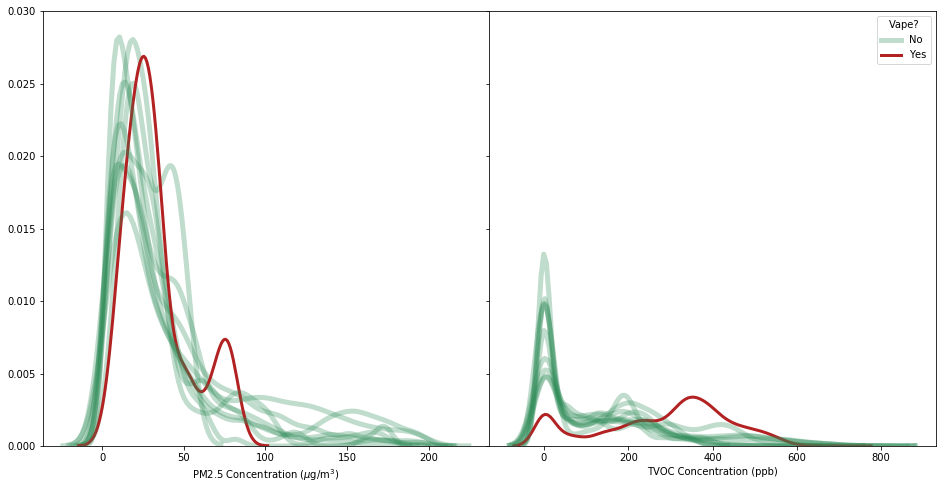

In [68]:
# Looking at non-averaged differences
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
for number in pm_df['number'].unique():
    df = pm_df[pm_df['number'] == number]
    df = df[df['pm2.5'] < 200]
    if number == '12':
        sns.kdeplot(data=df['pm2.5'],ax=ax[0],label='_none_',linewidth=3,color='firebrick')
    elif number == '01':
        sns.kdeplot(data=df['pm2.5'],ax=ax[0],label='_none_',linewidth=5,color='seagreen',alpha=0.3)
    else:
        sns.kdeplot(data=df['pm2.5'],ax=ax[0],label='_none_',linewidth=5,color='seagreen',alpha=0.3)
        
ax[0].set_xlabel('PM2.5 Concentration ($\mu$g/m$^3$)')

for number in tvoc_df['number'].unique():
    df = tvoc_df[tvoc_df['number'] == number]
    df = df[df['TVOC'] < 800]
    if number == '12':
        sns.kdeplot(data=df['TVOC'],ax=ax[1],label='Yes',linewidth=3,color='firebrick')
    elif number =='01':
        sns.kdeplot(data=df['TVOC'],ax=ax[1],linewidth=5,alpha=0.3,color='seagreen',label='No')
    else:
        sns.kdeplot(data=df['TVOC'],ax=ax[1],linewidth=5,alpha=0.3,color='seagreen',label='_none_')
        
ax[1].legend(title='Vape?')
ax[1].set_xlabel('TVOC Concentration (ppb)')
ax[1].set_ylim([0,0.03])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-heh-beacon-vape-pmtvoc-kdediff.png')
            
plt.show()
plt.close()

# HEH, Beiwe, and Fitbit
Now we try to combine three different modalities...somehow.

From **Beiwe** we have mood: contentment, sadness, stress, loneliness, and energy

From **Fitbit** we have: activity, sleep/sleep stages, steps, calories burned, and heart rate

From the **HEH survey** we have the following:

In [ ]:
heh.columns